# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.680764e+01     1.344468e+01
 * time: 0.0018799304962158203
     1     3.407506e+01     1.186921e+01
 * time: 0.0070989131927490234
     2     2.565341e+01     3.009352e+00
 * time: 0.013590812683105469
     3     2.171711e+01     3.110273e+00
 * time: 0.0190889835357666
     4     1.991305e+01     1.967054e+00
 * time: 0.025362014770507812
     5     1.932579e+01     2.147212e+00
 * time: 0.03068399429321289
     6     1.894497e+01     1.975849e+00
 * time: 0.03552985191345215
     7     1.850795e+01     1.181927e+00
 * time: 0.040328025817871094
     8     1.820513e+01     1.124084e+00
 * time: 0.04498481750488281
     9     1.802942e+01     8.617544e-01
 * time: 0.04954791069030762
    10     1.792712e+01     6.236985e-01
 * time: 0.05409598350524902
    11     1.786424e+01     5.065169e-01
 * time: 0.05878496170043945
    12     1.786250e+01     8.340066e-01
 * time: 0.06260180473327637
    13     1.781179e+01     6.434439e-01
 *

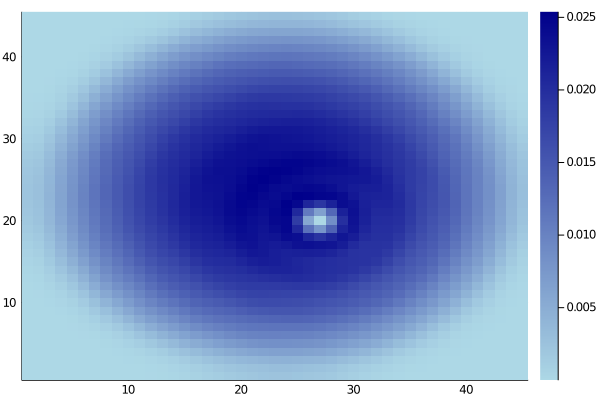

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)